# PP2.1 - Experimento I

#### Alunos:
   - Fabrício Mady
   - Bernardo Kanekiyo
   

In [3]:
import numpy as np
import pandas as pd
from random import  uniform
import matplotlib.pyplot as plt

## Classe do neurônio

In [4]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados(self):
        dataset = np.fromfile('data/dataAll.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            print("Pesos: ",self.pesos)
            print("Dado: ",entrada[1:]," Yd: ",yd," Yr: ",yr,"\n")
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                print("Numero de ajustes: ",numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        print("Numero de ajustes: ",numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos

        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        while(self.perceptron() == False):
            self.epocas+=1
            print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        
        self.descobre_x1_x2()
        
        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos: ",sum(self.total_de_ajustes))
            
n = Neuronio()

## Dataset

In [5]:
n.dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

## Pesos iniciais

In [6]:
n.pesos

array([ 0.26696211, -0.08578924,  0.09573953])

## Treinamento

In [7]:
n.treino()

-----------------------------
Época:  1 

Pesos:  [ 0.26696211 -0.08578924  0.09573953]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  1 

Numero de ajustes:  1
-----------------------------
Época:  2 

Pesos:  [  0.36696211  36.29305076 -24.31849047]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [  0.36696211  36.29305076 -24.31849047]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [  0.36696211  36.29305076 -24.31849047]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [  0.36696211  36.29305076 -24.31849047]
Dado:  [536.5905 764.9575]  Yd:  0  Yr:  1 

Numero de ajustes:  4
-----------------------------
Época:  3 

Pesos:  [   0.46696211  -17.36599924 -100.81424047]
Dado:  [-363.7884  244.1423]  Yd:  0  Yr:  0 

Pesos:  [   0.46696211  -17.36599924 -100.81424047]
Dado:  [ 328.7572 -256.7658]  Yd:  1  Yr:  1 

Pesos:  [   0.46696211  -17.36599924 -100.81424047]
Dado:  [-164.9827  613.2164]  Yd:  0  Yr:  0 

Pesos:  [   0.46696211  -17.36599924 -100.81424047]
Dado: 

## Pontos da reta (x1 e x2)

Demonstração dos pontos encontrados que irá gerar a reta de separação dos pontos.

In [8]:
print("X1: ", n.x1)
print("X2: ", n.x2)

X1:  -0.004817014294713145
X2:  0.004836875466756425


## Grafico ilustrando a distribuição dos dados
As amostras com rótulo 1 estão vermelhas e com rótulo 0 estão azuis

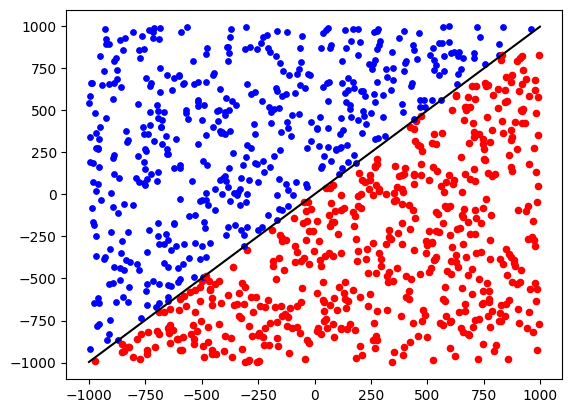

In [12]:
fig, ax = plt.subplots()

tamanho_da_reta = np.arange(-1000, 1000)

for i in n.dados:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        plt.scatter(x,y, color='r', s=20)
    else:
        plt.scatter(x,y, color='b', s=15)

m = -n.x1/n.x2
ax.plot(tamanho_da_reta, tamanho_da_reta*m, color="black")
plt.show()